#### Eploring NYC Public School Test Result Scores

In [1]:
import pandas as pd

In [2]:
school_nyc = pd.read_csv("schools.csv")
school_nyc.columns

Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested'],
      dtype='object')

<p>Reviso si el archivo tiene valores nulos</p>

In [3]:
school_nyc.isna().sum()

school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64

<p>¿Qué escuelas de Nueva York tienen los mejores resultados en matemáticas?</p>

<p>Los mejores resultados en matemáticas son al menos el 80% de la *puntuación máxima posible de 800*. 800*80% = 640</p>

In [10]:
math_score = school_nyc[school_nyc['average_math']>=640]
best_math_schools = math_score[['school_name','average_math']]
best_math_schools= best_math_schools.sort_values(by='average_math',ascending=False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


<p>¿Cuáles son las 10 escuelas con mejor rendimiento según las puntuaciones combinadas del SAT? </p>

<p>Genero una nueva columna llamada "total_SAT" que es la sumatoria de tres columnas: average_math, average_reading y average_writing </p>

In [5]:
school_nyc['total_SAT']=school_nyc[['average_math','average_reading','average_writing']].sum(axis=1)
school_nyc.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197


<p>Genero el data frame "top_10_schools"</p>

In [6]:
#1: Ordeno
top_10_schools = school_nyc.sort_values(by='total_SAT',ascending=False)
#2: Creo un subconjunto con los datos que necesito y muesttro los 10 primeros resultados
top_10_schools = top_10_schools[['school_name','total_SAT']].head(10)
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
93,Staten Island Technical High School,2041
170,Bronx High School of Science,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
68,"High School for Mathematics, Science, and Engi...",1889
45,Eleanor Roosevelt High School,1889


<p>¿Qué distrito tiene la mayor desviación estándar en la puntuación combinada del SAT? </p>

<p>Descubra la cantidad de escuelas, el SAT promedio y la desviación estándar del SAT para el distrito de la ciudad de Nueva York con la mayor desviación estándar, redondeada a dos decimales</p>

<p>Agrupo por la columna borough</p>

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
borough_group = school_nyc.groupby('borough')['total_SAT'].agg(['mean','count','std'])
borough_group = round(borough_group,2)
borough_group 

,mean,count,std
borough,,,
Bronx,1202.72,98,150.39
Brooklyn,1230.26,109,154.87
Manhattan,1340.13,89,230.29
Queens,1345.48,69,195.25
Staten Island,1439.00,10,222.30


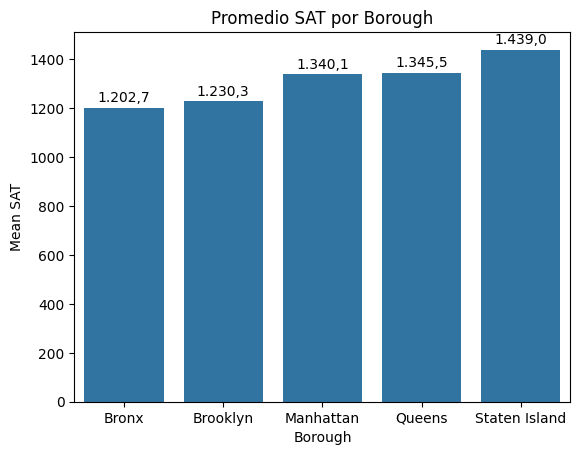

In [24]:
borough_group_reset = borough_group.reset_index()

ax = sns.barplot(data=borough_group_reset, x='borough', y='mean')

# Agregar etiquetas con formato: miles con punto, decimal con coma
for p in ax.patches:
    valor = p.get_height()
    # Formato con 1 decimal y separador de miles
    texto = f"{valor:,.1f}".replace(",", "X").replace(".", ",").replace("X", ".")
    
    ax.text(p.get_x() + p.get_width()/2,   # posición X
            valor + 10,                    # posición Y (un poco arriba de la barra)
            texto,                         # valor formateado
            ha='center', va='bottom', fontsize=10)
    
plt.xlabel("Borough")
plt.ylabel("Mean SAT")
plt.title("Promedio SAT por Borough")
plt.show()

<p>Filtro el desvio standar más grande<p>

In [14]:
#1: Filtro el desvio standar más grande
large_std_dev = borough_group[borough_group['std']==max(borough_group['std'])]
#2: Renobro las columnas del data frame
large_std_dev = large_std_dev.rename(
    columns={
        'count':'num_schools',
        'mean':'average_SAT',
        'std':'std_SAT'
    }
)
large_std_dev.reset_index(inplace=True)
#3: Muestro el DF con el STD más grande
large_std_dev

,borough,average_SAT,num_schools,std_SAT
0,Manhattan,1340.13,89,230.29
